In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
# best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.307808
W MnPosDef non-positive diagonal element in covariance matrix[ 1 ] = -27.3388
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -30.644
W MnPosDef Added to diagonal of Error matrix a value 31.144
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 0.0140523 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 3 ] = -0.0366536
W MnPosDef Added to diagonal of Error matrix a value 0.536655
W VariableMetricBuilder gdel = -478.749
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0105946


{'cvl': array([4.85437466, 0.07200405]),
 'cvr': array([0.70432088, 0.07439713]),
 'csl': array([0.5411467 , 0.14233008]),
 'csr': array([1.35596163, 0.14299391]),
 'ctl': array([1.01826808, 0.00572575]),
 'FFK_decorrelated[0]': array([0.23453428, 0.83879134]),
 'FFK_decorrelated[1]': array([0.36216866, 0.71449162]),
 'FFK_decorrelated[2]': array([-0.06655465,  0.55615036]),
 'FFK_decorrelated[3]': array([0.0220126 , 0.97721131]),
 'FFK_decorrelated[4]': array([0.11768287, 0.90890967]),
 'FFK_decorrelated[5]': array([-0.07444227,  0.7505644 ]),
 'FFK_decorrelated[6]': array([0.02552801, 0.97249097]),
 'FFK_decorrelated[7]': array([0.04276539, 0.92770915]),
 'mu': array([1., 0.]),
 'stat': [[1.0029355796225548, 0.004964526160047611],
  [0.9952728028045432, 0.004642646905132608],
  [0.9976909298411188, 0.005149804816325709],
  [1.0023590934793507, 0.005968429869597225],
  [1.00301169856777, 0.006932487988359215],
  [1.0024329912661012, 0.008190013992276146],
  [0.9970782565050952, 0.0098

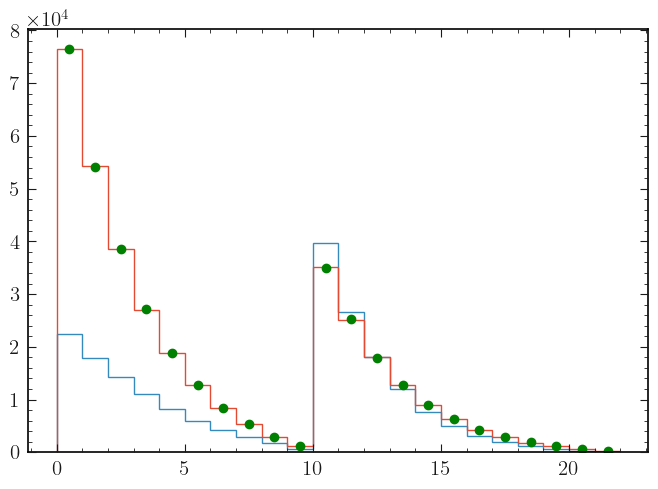

In [4]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')